In [ ]:
import numpy as np
import scipy as sp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def eqn1(alpha, n=10**2, temp=10**4):
    term1 = -np.sqrt(alpha) / 2
    term2 = 0
    key = jax.random.PRNGKey(42)

    @jax.jit
    def body(xi, key):
        z = jax.random.normal(key, (temp,))
        min_z = jnp.amin((y == jnp.sign(z)).astype(jnp.float32) + np.sqrt(alpha) / 2 * (z - xi) ** 2)
        return min_z

    for y in [1, -1]:
        s = 0
        for _ in range(n):
            key_xi, key_z = jax.random.split(key)
            keys = jax.random.split(key_z, temp)
            s += jnp.sum(jax.vmap(body)(jax.random.normal(key_xi, (len(keys),)), keys)) / temp
        term2 += s / n
    term2 = alpha / 2 * term2
    e_gs = term1 + term2
    return 1 - 2 / alpha * e_gs

In [3]:
alphas = np.linspace(1e-3, 20, 100)
res = [eqn1(a) for a in tqdm(alphas)]
res = [x / max(res) for x in res]

100%|██████████| 100/100 [01:22<00:00,  1.22it/s]


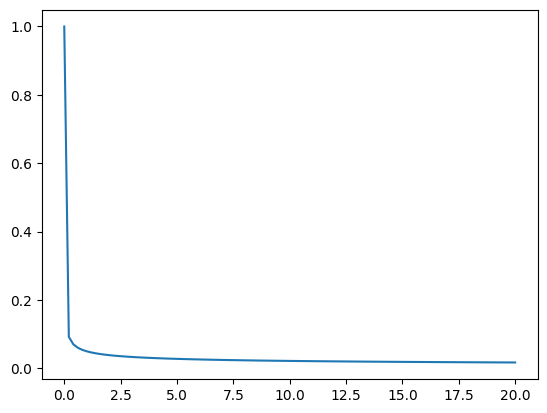

In [4]:
plt.plot(alphas, res)